In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Algerian_forest_updated_dataset.csv")

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.drop(['day', 'month', 'year'], axis= 1, inplace= True)

In [ ]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [ ]:
df["Classes"].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [ ]:
df["Classes"].value_counts()

,count
Classes,
1,137
0,106


In [ ]:
X = df.drop("FWI", axis =1)
Y = df['FWI']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((182, 11), (61, 11), (182,), (61,))

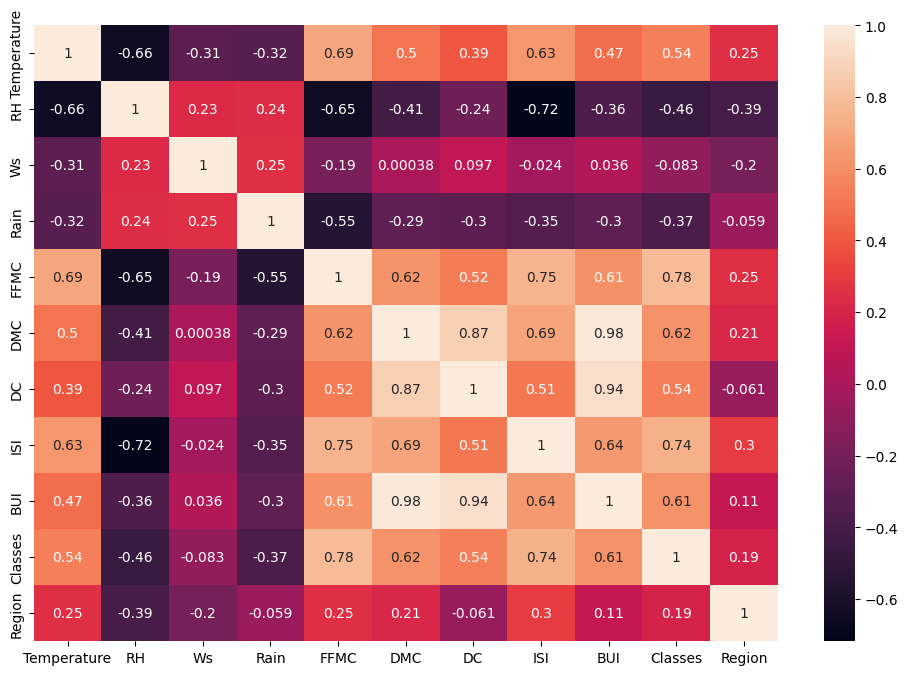

In [ ]:
plt.figure(figsize =(12,8))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X_train , 0.85)

In [ ]:
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

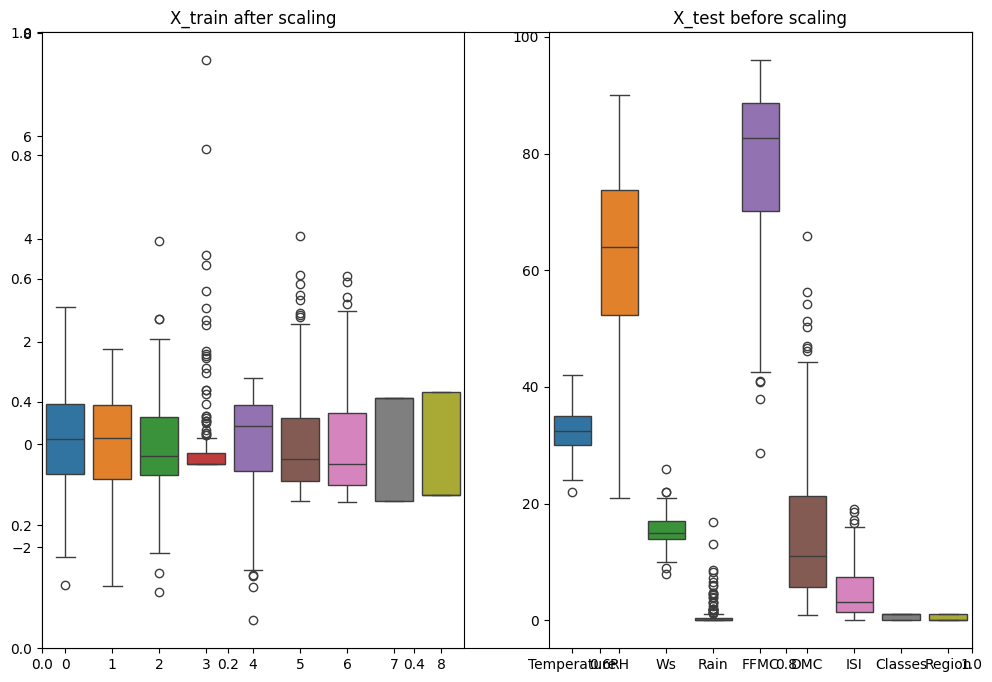

In [ ]:
plt.subplots(figsize = (12,8))
plt.subplot(1,2,1)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train)
plt.title("X_test before scaling")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regression = LinearRegression()
regression.fit(X_train_scaled, Y_train)

LinearRegression()

MAE: 0.5468236465249986
MSE: 0.6742766873791607
R2: 0.9847657384266951


Text(0, 0.5, 'Predicted Values')

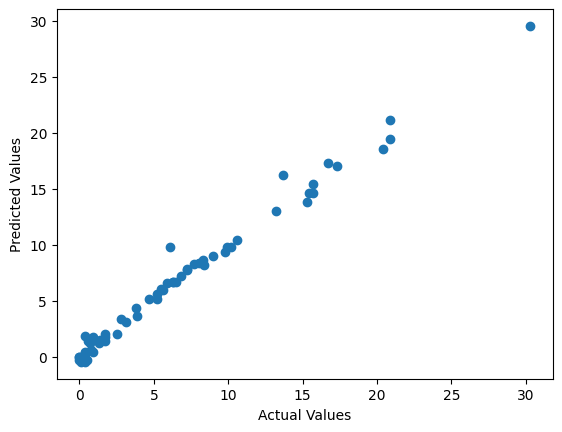

In [ ]:
Y_pred = regression.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

MAE: 1.133175994914409
MSE: 2.2483458918974772
R2: 0.9492020263112388


Text(0, 0.5, 'Predicted Values')

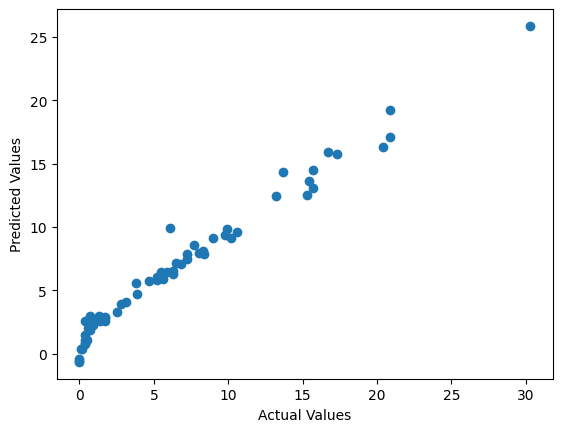

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, Y_train)
Y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [ ]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, Y_train)

LassoCV(cv=5, random_state=42)

MAE: 0.619970115826343
MSE: 0.792499555474362
R2: 0.9820946715928275


Text(0, 0.5, 'Predicted Values')

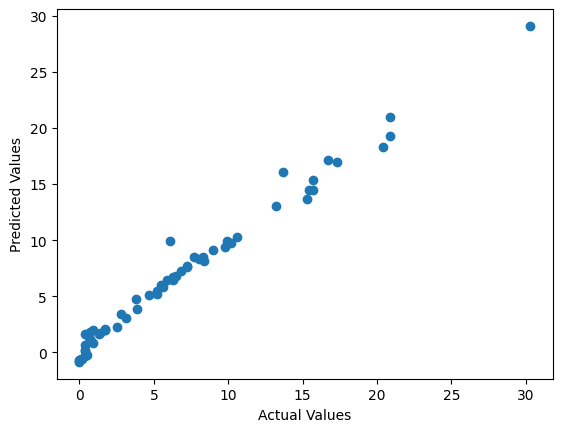

In [ ]:
Y_pred = lasso_cv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

MAE: 0.5642305340105692
MSE: 0.6949198918152074
R2: 0.9842993364555513


Text(0, 0.5, 'Predicted Values')

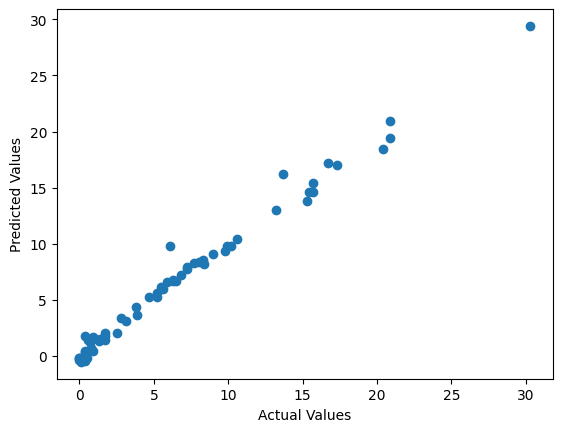

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train_scaled, Y_train)
Y_pred = Ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

MAE: 0.5642305340107913
MSE: 0.6949198918151805
R2: 0.9842993364555519


Text(0, 0.5, 'Predicted Values')

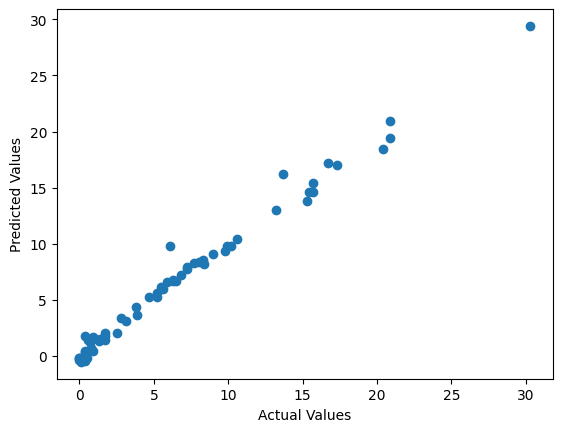

In [ ]:
from sklearn.linear_model import RidgeCV
Ridge_CV = RidgeCV()
Ridge_CV.fit(X_train_scaled, Y_train)
Y_pred = Ridge_CV.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

MAE: 1.8822353634896005
MSE: 5.5172511010252245
R2: 0.8753460589519703


Text(0, 0.5, 'Predicted Values')

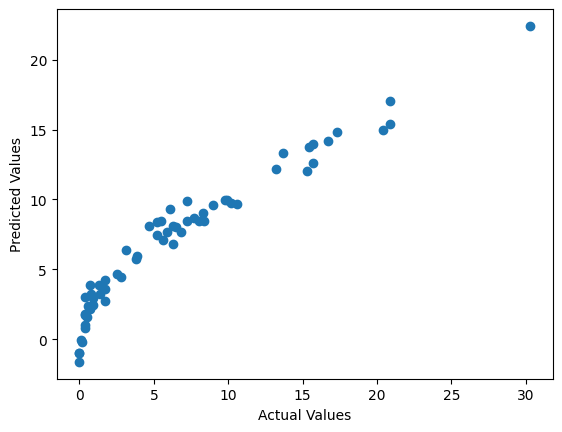

In [ ]:
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet()
Elastic.fit(X_train_scaled, Y_train)
Y_pred = Elastic.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

MAE: 0.6575946731430898
MSE: 0.8222830416276258
R2: 0.9814217587854941


Text(0, 0.5, 'Predicted Values')

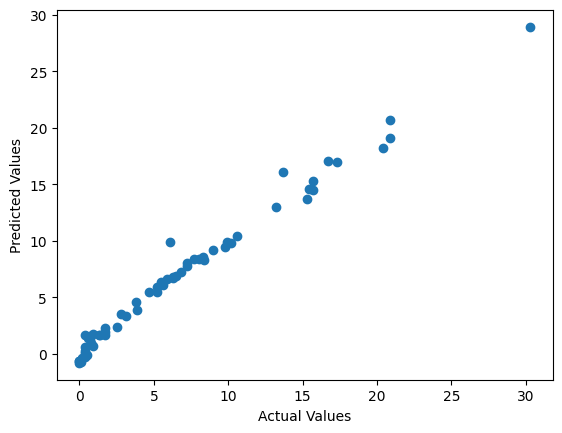

In [ ]:
from sklearn.linear_model import ElasticNetCV
Elastic_CV = ElasticNetCV()
Elastic_CV.fit(X_train_scaled, Y_train)
Y_pred = Elastic_CV.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")